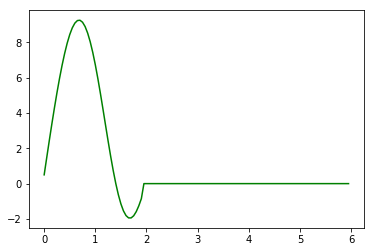

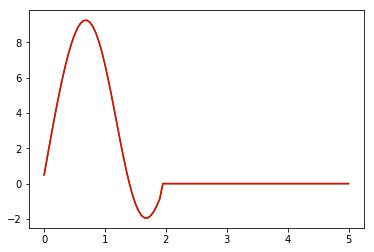

In [26]:
#
# Thermodynamics Force Calculation
# Cubic Spline Smoothing 
# 
# Masa Watanabe
# Berkeley National Lab, Summer 2018
# University of Saint Mary
# Version 0.1
#
#

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from scipy.interpolate import interp1d
from scipy.interpolate import spline
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline


InFileName = 'dens_gp.xvg'

N = 0
f = open(InFileName, 'r')
for line in f:
    li=line.strip()
    if (not li.startswith("#")) and (not li.startswith("@")):
        N += 1
f.close()

X = np.zeros(shape=(N,1))
Y = np.zeros(shape=(N,1))
Z = np.zeros(shape=(N,1))
LineNumber = 0
InFile = open(InFileName, 'r')
for line in InFile:
    li=line.strip()
    if (not li.startswith("#")) and (not li.startswith("@")):
        row = line.split()
        #Index the counter used to keep track of line number
        X[LineNumber] = float(row[0])
        #
        # Substracting the mean from the observed data
        # This Gaussian Processing assumes that mean function is near zero.
        #
        Y[LineNumber] = float(row[1])
        Z[LineNumber] = float(row[2])
        LineNumber += 1
InFile.close()
# -----------------------------------

RQx = np.concatenate(X)
DQx = np.concatenate(Y)
FQx = np.concatenate(Z)

plt.plot(RQx, FQx, 'g')
plt.show()

#FQx[np.where(RQx < 1.0)] = 0.0


cub = interp1d(RQx, FQx, kind='cubic')
cub0 = interp1d(RQx, DQx, kind="cubic")

rbf = Rbf(RQx, FQx)

xnew = np.linspace(0, 5, num=101, endpoint=True)
#xnew = Xp1 = np.arange(2.0,5.0,0.05)

f1 = rbf(xnew)
f2 = cub(xnew)
f3 = cub0(xnew)

#plt.scatter(RQx,DQx)
plt.plot(xnew, f1, 'g')
plt.plot(xnew, f2, 'r')
#plt.plot(xnew,f2(xnew))
plt.show()

Dataout = np.column_stack((xnew,f3-f3[-1],f2))
np.savetxt('dens_gp_s.xvg',(Dataout),fmt=('%10.5f', '%12.6f', '%12.6f'))



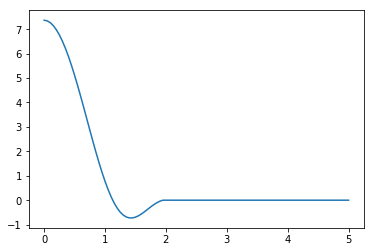

In [25]:
plt.plot(xnew,f3-f3[-1])
plt.show()